Matplotlib is building the font cache; this may take a moment.


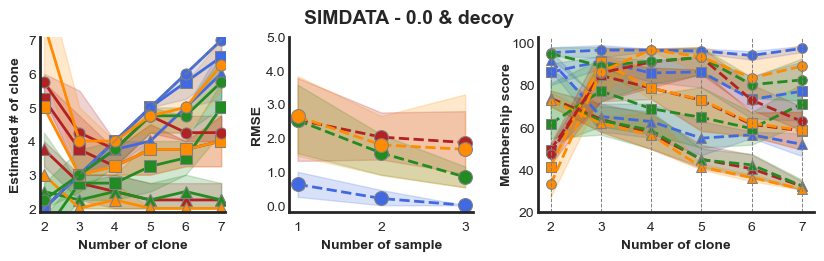

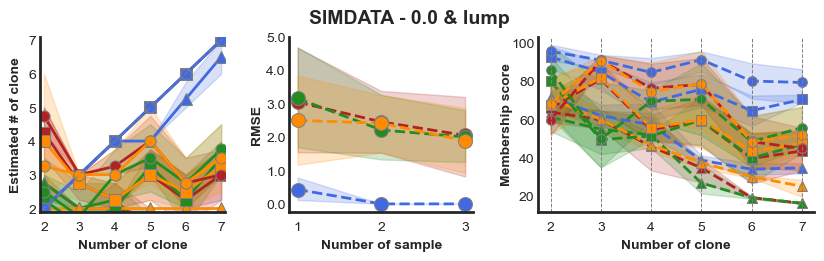

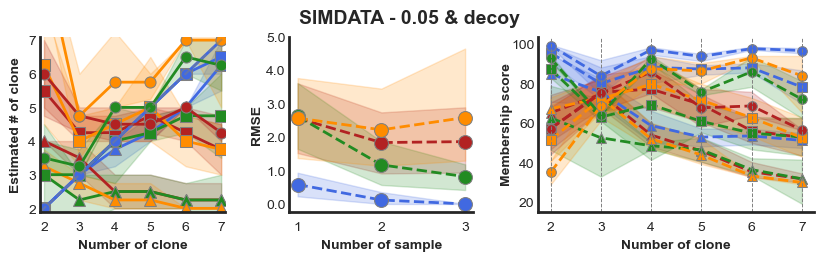

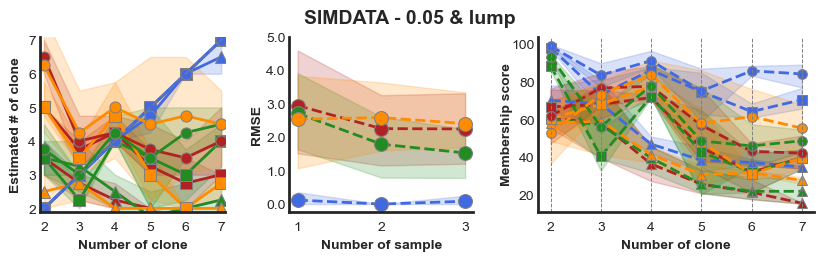

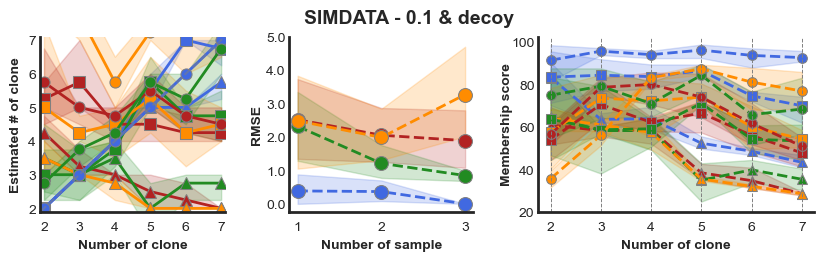

/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n500_125x/lump/0.1/clone_7/2/result/CLEMENT_decision.results.txt 없음


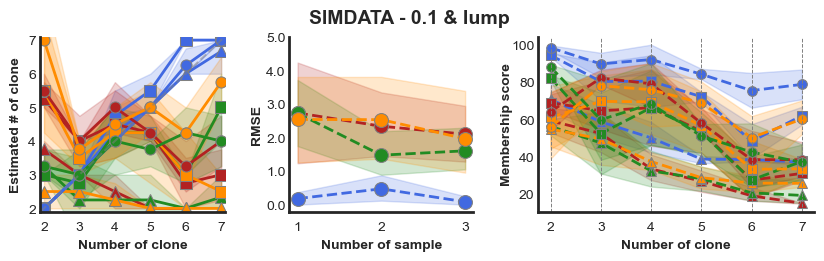

/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n500_125x/lump/0.1/clone_7/2/result/CLEMENT_decision.results.txt 없음


In [1]:
import numpy as np 
import pandas as pd
import os, glob, math
import matplotlib 
matplotlib.rcParams["font.family"] = 'arial'
import palettable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

for subdir in ["by_depth", "by_fpratio", "by_numclone", "by_numblock", "by_nummutation",  "proportions", "with_simpleKmeans", "Sex_chromosome", " FPdetection_ratio"]:
    OUTPUT_DIR = "/data/project/Alzheimer/YSscript/cle/Revision/" + str (subdir)
    if os.path.exists(OUTPUT_DIR) == False:
        os.system("mkdir -p " + OUTPUT_DIR)


tabl = palettable.tableau.Tableau_20.mpl_colors
safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

colorlist = [i for i in safe7]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", Gr_10[6], Gr_10[5], Gr_10[4]]
sns.set_style("white")
#sns.set_palette("tab10")
sns.set_palette(sns.color_palette(colorlist))


def drawfigure (long_df, x, title, saveloc ):
    # Create a grouped bar graph
    fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (7.8 / 2.54, 4 / 2.54))
    fig.subplots_adjust ( wspace = 0.4, bottom = 0.15, top = 0.85, left = 0.08, right = 0.98)

    # long_df = long_df.sort_values (by = x, axis = 0)
    # long_df[ x ] = long_df[ x ].astype(str)


    sns.lineplot(data = long_df, x = x, y = 'EC', hue = 'tool', 
                    linewidth = 2, marker = 'o',  markersize = 10, markeredgecolor = "gray", 
                    err_style = "band", ci = 95, ax = ax[0])
    ax[0].set_xlabel( None )
    ax[0].set_ylabel( "EC (RMSE)", fontsize = 8, fontweight = "semibold" )
    ax[0].yaxis.set_label_coords( -0.10, 0.5)   # ylabel을 왼쪽으로 살짝 이동
    
    ax[0].set_xticks ( sorted(list ( set(long_df[x])) ) ) 
    ax[0].legend_.remove()
    #ax[0].legend ( title = None, labels = ["CLEMENT", "pyclone", "sciclone", "qc"] )
    if x == "DEPTH_MEAN":
        ax[0].set_xticklabels ( [ str(i) + str ("x") for i in sorted( list ( set(long_df[x]) ) ) ] , fontsize = 8, fontweight = "normal"  ) 
    if x == "NUM_MUTATION":
        ax[0].set_xticklabels ( [ str("n") + str(i)  for i in sorted( list ( set(long_df[x]) ) ) ] , fontsize = 8, fontweight = "normal" ) 
    if x == "FP_RATIO":
        ax[0].set_xticklabels ( [ str(i * 100) + str ("%") for i in sorted( list ( set(long_df[x]) ) ) ] , fontsize = 8, fontweight = "normal" ) 
        ax[0].tick_params(axis = 'x', rotation = 30, pad = -2.2)
    ax[0].set_yticks ( np.arange (0, math.ceil (max(long_df["EC"])) + 0.1, 1).astype(int) )
    ax[0].tick_params(axis = 'y', pad = 0) 
    ax[0].set_yticklabels ( ax[0].get_yticks(), fontsize = 8, fontweight = "normal")

    sns.barplot(data = long_df, x = x, y = 'MS', hue = 'tool', 
                    linewidth = 1, edgecolor='gray', 
                    dodge = True,
                    ax = ax[1])
    ax[1].set_xlabel( None )
    ax[1].set_ylabel( "MS", fontsize = 8, fontweight = "semibold" )
    ax[1].yaxis.set_label_coords( -0.18, 0.5)   # ylabel을 왼쪽으로 살짝 이동
    
    ax[1].legend_.remove()
    #ax[1].legend ( title = None, labels = ["CLEMENT", "pyclone", "sciclone", "qc"] )
    if x == "DEPTH_MEAN":
        ax[1].set_xticklabels ( [ str(i) + str ("x") for i in sorted( list ( set(long_df[x]) ) ) ] , fontsize = 8, fontweight = "normal" ) 
    if x == "NUM_MUTATION":
        ax[1].set_xticklabels ( [ str("n") + str(i)  for i in sorted( list ( set(long_df[x]) ) ) ] , fontsize = 8, fontweight = "normal" ) 
    if x == "FP_RATIO":
        ax[1].set_xticklabels ( [ str(i * 100) + str ("%") for i in sorted( list ( set(long_df[x]) ) ) ] , fontsize = 8, fontweight = "normal" ) 
        ax[1].tick_params(axis = 'x', rotation = 30, pad = -2.2)
    ax[1].set_yticks ( np.arange (0, math.ceil (max(long_df["MS"]) / 100) * 100 + 1, 25) )
    ax[1].tick_params(axis = 'y', pad = -1.5) 
    ax[1].set_yticklabels ( ax[1].get_yticks(), fontsize = 8, fontweight = "normal")


    plt.suptitle( title , fontsize = 10, y = 0.98, fontweight = "semibold" )
    #fig.text (x = 0.5, y = 0.02, ha = "center", s = "{}".format( x  ), fontsize = 8, fontweight = "semibold")

    plt.savefig ( saveloc, dpi = 300 )
    plt.show()


def drawfigure_3column (long_df, RMSE_df, x, x_RMSE, NUM_CLONE_LIST, NUM_BLOCK_LIST, title, saveloc ):
    import matplotlib.gridspec as gridspec

    # Create a grouped bar graph
    # fig, ax = plt.subplots( nrows = 1, ncols = 3, figsize = (8, 2.5))
    # fig.subplots_adjust ( wspace = 0.3, bottom = 0.15, top = 0.85, left = 0.1, right = 0.96)

    fig = plt.figure(figsize=(9, 2.5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[2, 2, 3])      # Create subplots with different widths
    ax = [plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2])]
    fig.subplots_adjust ( wspace = 0.3, bottom = 0.17, top = 0.87, left = 0.09, right = 0.95)

    marker_dict = {1 : "^", 2 : "s", 3: "o" }
    for NUM_BLOCK in NUM_BLOCK_LIST:
        t =  ( long_df [ (long_df["NUM_BLOCK"] == NUM_BLOCK)  ] )
        sns.lineplot(data = t, x = x, y = 'EC', hue = 'tool', 
                        linewidth = 2, marker = marker_dict[NUM_BLOCK],  markersize = 8, markeredgecolor = "gray", 
                        err_style = "band", ci = 95, ax = ax[0])
    ax[0].set_xlabel( "Number of clone", fontsize = 10, fontweight = "semibold"  )
    ax[0].set_ylabel( "Estimated # of clone", fontsize = 10, fontweight = "semibold"  )
    ax[0].yaxis.set_label_coords( -0.10, 0.5)  # ylabel을 이동 (- 왼쪽)
    ax[0].set_xticks ( sorted(list ( set(long_df[x])) ) ) 
    ax[0].set_yticks ( sorted(list ( set(long_df[x])) ) ) 
    ax[0].set_xticklabels ( ax[0].get_xticks(), fontweight = "normal" ) 
    ax[0].set_yticklabels ( ax[0].get_yticks(), fontweight = "normal" ) 
    ax[0].tick_params(axis = 'y', pad = -0.3) 
    ax[0].axis ([1.9, 7.1, 1.9, 7.1])
    xmin, xmax, ymin, ymax = ax[0].axis()
    ax[0].plot( np.linspace (xmin, xmax, 100), np.linspace (ymin, ymax, 100), label='y=x', color = 'gray', linestyle = "--", linewidth = 1.5, alpha = 0.5)
    sns.despine ( top = True, right = True, ax = ax[0])
    for axis in ['left','bottom']:
        ax[0].spines[axis].set_linewidth(2)
    ax[0].legend_.remove()


    sns.lineplot(data = RMSE_df, x = x_RMSE, y = 'RMSE', hue = 'tool', 
                    linewidth = 2, linestyle = "--", marker = 'o',  markersize = 10, markeredgecolor = "gray", 
                    err_style = "band", ci = 95, ax = ax[1])
    ax[1].set_xlabel( "Number of sample", fontsize = 10, fontweight = "semibold"  )
    ax[1].set_ylabel( "RMSE", fontsize = 10, fontweight = "semibold" )
    ax[1].yaxis.set_label_coords( -0.14, 0.5)  # ylabel을 이동 (- 왼쪽)
    ax[1].set_xticks ( sorted(list ( set(RMSE_df[x_RMSE])) ) ) 
    xmin, xmax, ymin, ymax = ax[1].axis()
    ax[1].set_yticks ( np.arange (0, ymax + 1 , 1 ) )
    ax[1].set_xticklabels ( ax[1].get_xticks(), fontweight = "normal" ) 
    ax[1].set_yticklabels ( ax[1].get_yticks(), fontweight = "normal" ) 
    ax[1].tick_params(axis = 'y', pad = -1.0) 
    sns.despine ( top = True, right = True, ax = ax[1])
    for axis in ['left','bottom']:
        ax[1].spines[axis].set_linewidth(2)
    ax[1].legend_.remove()


    marker_dict = {1 : "^", 2 : "s", 3: "o" }
    for NUM_BLOCK in NUM_BLOCK_LIST:
        t =  ( long_df [ (long_df["NUM_BLOCK"] == NUM_BLOCK)  ] )
        sns.lineplot(data = t, x = x, y = 'MS', hue = 'tool', 
                linewidth = 2, linestyle = "--", marker = marker_dict[NUM_BLOCK],  markersize = 7, markeredgecolor = "gray", 
                err_style = "band", ci = 95, ax = ax[2])
    for NUM_CLONE in NUM_CLONE_LIST:
        ax[2].axvline(x = NUM_CLONE, color = 'gray', linestyle='--', linewidth = 0.7)
    ax[2].set_xlabel( "Number of clone", fontsize = 10, fontweight = "semibold"  )
    ax[2].set_ylabel( "Membership score", fontsize = 10, fontweight = "semibold"  )
    ax[2].set_xticks ( sorted(list ( set(long_df[x])) ) ) 
    ax[2].set_yticks ( np.linspace(20, 100, 5).astype("int")) 
    ax[2].yaxis.set_label_coords( -0.09, 0.5)  # ylabel을 이동 (- 왼쪽)
    ax[2].tick_params(axis = 'y', pad = -1.0)
    ax[2].set_xticklabels ( ax[2].get_xticks(), fontweight = "normal" ) 
    ax[2].set_yticklabels ( ax[2].get_yticks(), fontweight = "normal" ) 
    sns.despine ( top = True, right = True, ax = ax[2])
    for axis in ['left','bottom']:
        ax[2].spines[axis].set_linewidth(2)
    ax[2].legend_.remove()
    #ax[1].legend ( title = None, labels = ["CLEMENT", "pyclone", "sciclone", "qc"] )


    plt.suptitle( title , fontsize = 14, y = 0.98, fontweight = "semibold" )
    plt.savefig ( saveloc, dpi = 300 )
    plt.show()


#######################################################################################################################

def bm_by_depth ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, FP_RATIO_LIST, SIMDATA_LIST):
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]

    for FP_RATIO in FP_RATIO_LIST:
        for SIMDATA in SIMDATA_LIST:        
            long_df = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "FP_RATIO", "SIMDATA", "tool", "MS", "EC"] )
        
            for DEPTH_MEAN in DEPTH_MEAN_LIST:
                for NUM_BLOCK in NUM_BLOCK_LIST:
                    for NUM_MUTATION in NUM_MUTATION_LIST:
                        INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/BM_FINAL.tsv") )

                        for INPUT_DIR in INPUT_DIR_LIST:
                            if not os.path.exists ( INPUT_DIR ):
                                print (INPUT_DIR + "없음")
                                continue
                            
                            df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                            for tool in toollist:
                                long_df.loc[len(long_df.index)] = [ DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, FP_RATIO, SIMDATA, tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
            
            long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize

            # Visuallization
            drawfigure (long_df, 'DEPTH_MEAN', "SimData - {} & fp_{}".format (SIMDATA, FP_RATIO), "/data/project/Alzheimer/YSscript/cle/Revision/by_depth/1.SimData-bydepth_{}_{}.pdf".format (SIMDATA, FP_RATIO))

            # tsv로 정리해서 저장하기
            tt = pd.concat ( [  round (long_df.groupby (["DEPTH_MEAN", "tool"])["EC"].mean() , 2), round (long_df.groupby (["DEPTH_MEAN", "tool"])["MS"].mean() , 2)] , axis = 1)
            tt.columns = ["RMSE_mean", "MS_mean"]
            tt = tt.astype ( {"RMSE_mean" : "str", "MS_mean" : "str"})
            k = 0
            while k < tt.shape[0]:
                MS_ratio =  [ float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+1]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+2]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+3]["MS_mean"]) ]
                tt.iloc[k, 1] = tt.iloc[k]["MS_mean"] + " ({}-{}% ↑)".format ( round ( min (MS_ratio) * 100, 1), round ( max (MS_ratio) * 100, 1) )
                k += len(toollist)
            tt.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/by_depth/1.SimData-bydepth_{}_{}.tsv".format (SIMDATA, FP_RATIO),  sep = "\t", index = True)

    return long_df



def bm_by_nummutation ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, FP_RATIO_LIST, SIMDATA_LIST):
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]

    for FP_RATIO in FP_RATIO_LIST:
        for SIMDATA in SIMDATA_LIST:        
            long_df = pd.DataFrame ( columns = ["NUM_BLOCK", "NUM_MUTATION", "DEPTH_MEAN", "FP_RATIO", "SIMDATA", "tool", "MS", "EC"] )
        
            for NUM_MUTATION in NUM_MUTATION_LIST:
                for NUM_BLOCK in NUM_BLOCK_LIST:
                    for DEPTH_MEAN in DEPTH_MEAN_LIST:
                        INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/BM_FINAL.tsv") )

                        for INPUT_DIR in INPUT_DIR_LIST:
                            if not os.path.exists ( INPUT_DIR ):
                                print (INPUT_DIR + "없음")
                                continue
        
                            df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                            for tool in toollist:
                                long_df.loc[len(long_df.index)] = [ NUM_BLOCK, NUM_MUTATION, DEPTH_MEAN, FP_RATIO, SIMDATA, tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
            
            long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize

            # Visuallization
            drawfigure (long_df, 'NUM_MUTATION', "SimData - {} & fp_{}".format (SIMDATA, FP_RATIO), "/data/project/Alzheimer/YSscript/cle/Revision/by_nummutation/1.SimData-bynummutation_{}_{}.pdf".format (SIMDATA, FP_RATIO))

            # tsv로 정리해서 저장하기
            tt = pd.concat ( [  round (long_df.groupby (["NUM_MUTATION", "tool"])["EC"].mean() , 2), round (long_df.groupby (["NUM_MUTATION", "tool"])["MS"].mean() , 2)] , axis = 1)
            tt.columns = ["RMSE_mean", "MS_mean"]
            tt = tt.astype ( {"RMSE_mean" : "str", "MS_mean" : "str"})
            k = 0
            while k < tt.shape[0]:
                MS_ratio =  [ float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+1]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+2]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+3]["MS_mean"]) ]
                tt.iloc[k, 1] = tt.iloc[k]["MS_mean"] + " ({}-{}% ↑)".format ( round ( min (MS_ratio) * 100, 1), round ( max (MS_ratio) * 100, 1) )
                k += 4
            tt.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/by_nummutation/1.SimData-bynummutation_{}_{}.tsv".format (SIMDATA, FP_RATIO),  sep = "\t", index = True)

    return long_df


def bm_by_fpratio ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, FP_RATIO_LIST, SIMDATA_LIST):
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]

    for SIMDATA in SIMDATA_LIST:        
        long_df = pd.DataFrame ( columns = ["NUM_BLOCK", "NUM_MUTATION", "DEPTH_MEAN", "FP_RATIO", "SIMDATA", "tool", "MS", "MS_std", "EC", "EC_std"] )
        for FP_RATIO in FP_RATIO_LIST:
        
            for NUM_BLOCK in NUM_BLOCK_LIST:
                for NUM_MUTATION in NUM_MUTATION_LIST:
                    for DEPTH_MEAN in DEPTH_MEAN_LIST:
                        INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/BM_FINAL.tsv") )

                        for INPUT_DIR in INPUT_DIR_LIST:
                            if not os.path.exists ( INPUT_DIR ):
                                print (INPUT_DIR + "없음")
                                continue
        
                            df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                            for tool in toollist:
                                long_df.loc[len(long_df.index)] = [ NUM_BLOCK, NUM_MUTATION, DEPTH_MEAN, FP_RATIO, SIMDATA, tool, df.loc [tool][1], df.loc [tool][2], df.loc [tool][3], df.loc [tool][4] ]   # 맨 끝에 하나씩 추가
            
        
        long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize
        long_df["MS_std"] = long_df["MS_std"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 표준편차도 normalize
        # Visualization
        drawfigure (long_df, 'FP_RATIO', "SimData - {}".format (SIMDATA), "/data/project/Alzheimer/YSscript/cle/Revision/by_fpratio/1.SimData-byfpratio_{}.pdf".format (SIMDATA))

        # tsv로 정리해서 저장하기
        #tt = round (long_df.groupby (["FP_RATIO", "tool"]).mean() , 2)
        tt = pd.concat ( [  round (long_df.groupby (["FP_RATIO", "tool"])["MS"].mean() , 2), round (long_df.groupby (["FP_RATIO", "tool"])["EC"].mean() , 2)] , axis = 1)
        tt.columns = ["MS_mean", "RMSE_mean"]
        tt = tt.astype ( {"MS_mean" : "str", "RMSE_mean" : "str"})
        k = 0
        while k < tt.shape[0]:
            MS_ratio =  [ float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+1]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+2]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+3]["MS_mean"]) ]
            tt.iloc[k, 0] = tt.iloc[k]["MS_mean"] + " ({}-{}% ↑)".format ( round ( min (MS_ratio) * 100, 1), round ( max (MS_ratio) * 100, 1) )
            k += 4
        tt.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/by_fpratio/1.SimData-byfpratio_n{}_{}x_{}.tsv".format (NUM_MUTATION_LIST[0], DEPTH_MEAN_LIST[0], SIMDATA),  sep = "\t", index = True)

    return long_df

################################################################################################################################################################################################################################################

def bm_by_numclone ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_CLONE_LIST, FP_RATIO_LIST, SIMDATA_LIST, BENCHMARK_LIST):
    from sklearn.metrics import mean_squared_error
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]

    for FP_RATIO in FP_RATIO_LIST:
        for SIMDATA in SIMDATA_LIST:         # "deocy, lump"
            long_df = pd.DataFrame ( columns = ["NUM_BLOCK", "NUM_CLONE", "NUM_MUTATION", "DEPTH_MEAN", "FP_RATIO", "SIMDATA", "tool", "MS", "ARI", "EC"] )
            RMSE_df = pd.DataFrame ( columns = ["NUM_BLOCK", "NUM_CLONE", "tool", "RMSE"] )
        
            for NUM_MUTATION in NUM_MUTATION_LIST:
                for DEPTH_MEAN in DEPTH_MEAN_LIST:

                    for NUM_CLONE in NUM_CLONE_LIST:
                        for NUM_BLOCK in NUM_BLOCK_LIST:
                            # INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) + "/*") )
                            
                            # for INPUT_DIR in INPUT_DIR_LIST:
                            for BENCHMARK_NO in range (BENCHMARK_LIST[0], BENCHMARK_LIST[1] + 1):
                                INPUT_DIR = "/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) + "/" + str(BENCHMARK_NO)
                                if "bm.jpg" in INPUT_DIR:
                                    continue
                                if not os.path.exists ( INPUT_DIR ):
                                    print (INPUT_DIR + "없음")
                                    continue
                                if not os.path.exists ( INPUT_DIR + "/result/CLEMENT_decision.results.txt" ):
                                    print (INPUT_DIR + "/result/CLEMENT_decision.results.txt 없음" )
                                    continue
                                if not os.path.exists ( INPUT_DIR + "/result/pyclonevi.results.txt" ):
                                    #print (INPUT_DIR + "/result/pyclonevi.results.txt 없음" )
                                    continue
                                if not os.path.exists ( INPUT_DIR + "/result/sciclone.results.txt" ):
                                    #print (INPUT_DIR + "/result/sciclone.results.txt 없음" )
                                    continue
                                if not os.path.exists ( INPUT_DIR + "/result/quantumclone.results.txt" ):
                                    #print (INPUT_DIR + "/result/quantumclone.results.txt 없음" )
                                    continue
            
                                for tool in toollist:
                                    df = pd.read_csv ( INPUT_DIR + "/result/{}.results.txt".format (tool) , sep = "\t", header = None, index_col = 0)
                                    long_df.loc[len(long_df.index)] = [ NUM_BLOCK, NUM_CLONE, NUM_MUTATION, DEPTH_MEAN, FP_RATIO, SIMDATA, tool, int(df.loc ["score"][1].split("/")[0]), float(df.loc ["ARI"][1]), int(df.loc ["NUM_CLONE"][1]) ]   # 맨 끝에 하나씩 추가
                            
            long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize 

            for NUM_BLOCK in NUM_BLOCK_LIST:
                for NUM_CLONE in NUM_CLONE_LIST:
                    for tool in toollist:
                        t =  ( long_df [ (long_df["NUM_BLOCK"] == NUM_BLOCK) & (long_df["NUM_CLONE"] == NUM_CLONE) & (long_df["tool"] == tool) ] )
                        try:
                            RMSE = mean_squared_error( np.array( t["EC"].astype ("int")), np.array ( t["NUM_CLONE"].astype ("int") ))**0.5
                        except:
                            print ( "Error : FP_RATIO = {}\tSIMDATA = {}\tNUM_MUTATION = {}\tNUM_BLOCK = {}\tNUM_CLONE = {}\ttool = {}".format( FP_RATIO, SIMDATA, NUM_MUTATION, NUM_BLOCK, NUM_CLONE, tool ))
                            print ( t )
                        RMSE_df.loc[len(RMSE_df.index)] = [ NUM_BLOCK, NUM_CLONE, tool, RMSE ]   # 맨 끝에 하나씩 추가


            # Visualization
            drawfigure_3column (long_df, RMSE_df, 'NUM_CLONE', "NUM_BLOCK", NUM_CLONE_LIST, NUM_BLOCK_LIST, "SimData - {} & {}".format (FP_RATIO, SIMDATA), "/data/project/Alzheimer/YSscript/cle/Revision/by_numclone/1.SimData-byclone_{}_{}.pdf".format (FP_RATIO, SIMDATA))

            # A, C에 대해 tsv로 저장하기
            tt = round ( pd.concat ( [pd.DataFrame ( long_df.groupby (["NUM_CLONE", "tool"])["EC"].mean() ), pd.DataFrame ( long_df.groupby (["NUM_CLONE", "tool"])["EC"].std() ), pd.DataFrame ( long_df.groupby (["NUM_CLONE", "tool"])["MS"].mean()) , pd.DataFrame ( long_df.groupby (["NUM_CLONE", "tool"])["MS"].std()) ] , axis = 1) , 2)
            tt.columns = ["EC_mean", "EC_std", "MS_mean", "MS_std"]
            tt = tt.astype ( {"EC_mean" : "str", "MS_mean" : "str"})
            k = 0
            while k < tt.shape[0]:
                MS_ratio =  [ float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+1]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+2]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+3]["MS_mean"]) ]
                tt.iloc[k, 2] = tt.iloc[k]["MS_mean"] + " ({}-{}% ↑)".format ( round ( min (MS_ratio) * 100, 1), round ( max (MS_ratio) * 100, 1) )
                k += 4
            tt.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/by_numclone/1.SimData-bynumclone_AC_{}_{}.tsv".format (FP_RATIO, SIMDATA), sep = "\t", index = True)

            # B에 대해 tsv로 저장하기
            ttt = round ( pd.DataFrame ( RMSE_df.groupby(["NUM_BLOCK", "tool"])["RMSE"].mean() ), 2)
            ttt.columns = ["RMSE_mean"]
            ttt.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/by_numclone/1.SimData-bynumclone_B_{}_{}.tsv".format (FP_RATIO, SIMDATA), sep = "\t", index = True)


    return long_df, RMSE_df


def find_softclustering ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_CLONE_LIST, FP_RATIO_LIST, SIMDATA_LIST, BENCHMARK_LIST):
    
    long_df = pd.DataFrame ( columns = ["CLEMENT_DECISION", "FP_EXISTENCE", "NUM_BLOCK", "NUM_MUTATION", "DEPTH_MEAN",  "SIMDATA", "FP_RATIO", "NUM_CLONE", "BENCHMARK_NO", "tool", "MS", "ARI", "EC", "EC_pyclonevi", "EC_sciclone", "EC_quantumclone"] )
    for FP_RATIO in FP_RATIO_LIST:
        for SIMDATA in SIMDATA_LIST:         # "deocy, lump"
            RMSE_df = pd.DataFrame ( columns = ["NUM_BLOCK", "NUM_CLONE", "tool", "RMSE"] )
        
            for NUM_MUTATION in NUM_MUTATION_LIST:
                for DEPTH_MEAN in DEPTH_MEAN_LIST:

                    for NUM_CLONE in NUM_CLONE_LIST:
                        for NUM_BLOCK in NUM_BLOCK_LIST:        
                            for BENCHMARK_NO in range (BENCHMARK_LIST[0], BENCHMARK_LIST[1] + 1):
                                INPUT_DIR = "/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) + "/" + str(BENCHMARK_NO)
                                if "bm.jpg" in INPUT_DIR:
                                    continue
                                if not os.path.exists ( INPUT_DIR ):
                                    print (INPUT_DIR + "없음")
                                    continue
                                if not os.path.exists ( INPUT_DIR + "/result/CLEMENT_decision.results.txt" ):
                                    print (INPUT_DIR + "/result/CLEMENT_decision.results.txt 없음" )
                                    continue
                                if not os.path.exists ( INPUT_DIR + "/result/pyclonevi.results.txt" ):
                                    #print (INPUT_DIR + "/result/pyclonevi.results.txt 없음" )
                                    continue
                                if not os.path.exists ( INPUT_DIR + "/result/sciclone.results.txt" ):
                                    #print (INPUT_DIR + "/result/sciclone.results.txt 없음" )
                                    continue
                                if not os.path.exists ( INPUT_DIR + "/result/quantumclone.results.txt" ):
                                    #print (INPUT_DIR + "/result/quantumclone.results.txt 없음" )
                                    continue
            
                                with open( INPUT_DIR + "/result/CLEMENT_decision.evidence.txt", "r") as file:
                                    df1 = file.readline().rstrip("\n").split("\t")
                                    df1 = pd.DataFrame (df1).T
                                    df1 = df1.set_index ( df1.columns[0] )
                                df2 = pd.read_csv ( INPUT_DIR + "/result/CLEMENT_decision.results.txt" , sep = "\t", header = None, index_col = 0)
                                df_pyclonevi = pd.read_csv ( INPUT_DIR + "/result/pyclonevi.results.txt" , sep = "\t", header = None, index_col = 0)
                                df_sciclone = pd.read_csv ( INPUT_DIR + "/result/sciclone.results.txt" , sep = "\t", header = None, index_col = 0)
                                df_quantumclone = pd.read_csv ( INPUT_DIR + "/result/quantumclone.results.txt" , sep = "\t", header = None, index_col = 0)

                                long_df.loc[len(long_df.index)] = [ df1.loc["DECISION"][1], bool(df2.loc["FPexistence"][1]), NUM_BLOCK, NUM_MUTATION, DEPTH_MEAN, SIMDATA, FP_RATIO, NUM_CLONE,  BENCHMARK_NO, "CLEMENT_decision", int(df2.loc ["score"][1].split("/")[0]), float(df2.loc ["ARI"][1]), int(df2.loc ["NUM_CLONE"][1]), int(df_pyclonevi.loc ["NUM_CLONE"][1]), int(df_sciclone.loc ["NUM_CLONE"][1]), int(df_quantumclone.loc ["NUM_CLONE"][1]) ]   # 맨 끝에 하나씩 추가

    long_df = long_df.sort_values (by = ["NUM_BLOCK", "NUM_MUTATION", "DEPTH_MEAN", "SIMDATA", "FP_RATIO", "NUM_CLONE", "BENCHMARK_NO"], axis = 0)
    return long_df


if __name__ == "__main__":
    kwargs = {}

    NUM_BLOCK_LIST = [ 1, 2, 3 ]             # 1, 2, 3
    NUM_MUTATION_LIST = [ 1000, 500, 100 ]    # 100, 500, 100
    DEPTH_MEAN_LIST = [ 250, 125, 30 ]       # 250, 125, 30
    FP_RATIO_LIST = [ 0.0, 0.1  ]        # 0.0, 0.1
    SIMDATA_LIST = [ "decoy", "lump"] # "decoy", "lump"
    NUM_CLONE_LIST = [2, 3, 4, 5, 6, 7]      # 2, 3, 4, 5, 6, 7
    BENCHMARK_LIST = [0, 3]

    global toollist
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]
                           

    # Depth에 따른 benchmark (NUM_MUTATION은 500으로 고정)
    #long_df = bm_by_depth ( [1, 2, 3], [500], [250, 125, 30], FP_RATIO_LIST, SIMDATA_LIST )
    
    #  NUM_MUTATION에 따른 benchmark (DEPTH는 125으로 고정)
    #long_df = bm_by_nummutation ( NUM_BLOCK_LIST, [ 1000, 500, 100 ], [125], FP_RATIO_LIST, SIMDATA_LIST )

    #  FP에 따른 benchmark (NUM_MUTATION은 500, DEPTH는 125으로 고정)
    #long_df = bm_by_fpratio ( [1, 2, 3], [500], [125],  [ 0.0, 0.025, 0.05, 0.075, 0.1 ], SIMDATA_LIST )

    #  (Main figure) NUM_CLONE에 따른 benchmark (NUM_MUTATION은 500, DEPTH는 250으로 고정)
    long_df, RMSE_df = bm_by_numclone ( [1, 2, 3],[500], [125], NUM_CLONE_LIST, [0.0, 0.05, 0.1], SIMDATA_LIST, BENCHMARK_LIST )

    # (Main figure) example 뽑기 
    long_df = find_softclustering ( [1, 2, 3],[500], [125], NUM_CLONE_LIST, [0.0, 0.1] ,SIMDATA_LIST, BENCHMARK_LIST )
    long_df[ (long_df["CLEMENT_DECISION"] == "hard_1st") & ((long_df["NUM_BLOCK"].isin ([3]))) & ((long_df["FP_RATIO"] != 0.0)) & (long_df["FP_EXISTENCE"] == True) &  (long_df["EC"] == long_df["NUM_CLONE"]) & (long_df["EC_pyclonevi"] != long_df["NUM_CLONE"] + 1 )  &  (long_df["EC_quantumclone"] != long_df["NUM_CLONE"] + 1 )   ]

        

### SimData example 찾기

In [4]:
long_df[ (long_df["CLEMENT_DECISION"] == "hard_1st") & ((long_df["NUM_BLOCK"].isin ([3]))) & ((long_df["FP_RATIO"] != 0.0)) & (long_df["FP_EXISTENCE"] == True) &  (long_df["EC"] == long_df["NUM_CLONE"]) & (long_df["EC_pyclonevi"] != long_df["NUM_CLONE"] + 1 )  &  (long_df["EC_quantumclone"] != long_df["NUM_CLONE"] + 1 )   ]

KeyError: 'CLEMENT_DECISION'

In [38]:
tt = pd.concat ( [  round (long_df.groupby (["NUM_MUTATION", "tool"])["EC"].mean() , 2), round (long_df.groupby (["NUM_MUTATION", "tool"])["MS"].mean() , 2)] , axis = 1)
tt.columns = ["RMSE_mean", "MS_mean"]
tt = tt.astype ( {"RMSE_mean" : "str", "MS_mean" : "str"})
k = 0
while k < tt.shape[0]:
    MS_ratio =  [ float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+1]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+2]["MS_mean"]), float(tt.iloc[k]["MS_mean"]) / float(tt.iloc[k+3]["MS_mean"]) ]
    tt.iloc[k, 1] = tt.iloc[k]["MS_mean"] + " ({}-{}% ↑)".format ( round ( min (MS_ratio) * 100, 1), round ( max (MS_ratio) * 100, 1) )
    k += 4
tt

RMSE_mean                 MS_mean
NUM_MUTATION tool                                              
100          CLEMENT_decision      0.65  69.94 (138.2-145.9% ↑)
             pyclonevi              2.1                   50.56
             quantumclone          2.81                   50.61
             sciclone              1.74                   47.94
500          CLEMENT_decision      0.59  71.08 (139.6-148.2% ↑)
             pyclonevi             2.31                   50.91
             quantumclone          2.93                   47.97
             sciclone              1.94                   48.19
1000         CLEMENT_decision      0.68  70.22 (140.2-146.6% ↑)
             pyclonevi             2.17                   50.07
             quantumclone          2.96                   47.91
             sciclone               1.9                   48.62